In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [5]:
# Load your cleaned data
df = pd.read_csv('../data/cleaned_qa_data.csv')  # Or use 'simulated_qa_data.csv' if not saved earlier

df.head()  # Verify it's loaded

,Client_Name,Industry,Country,Service_Used,Project_Duration_Days,Project_Cost_INR,Revenue_Generated_INR,Is_Renewed,Team_Size,Feedback_Score,Project_Month,Profit_INR,ROI,Project_Size,Feedback_Level,Renewed_Flag,Client_Success_Score
0,Client_164,Retail,USA,API Testing,322,1088625,613320,Yes,5,6,Aug,-475305,-0.436610,Long-term,Low,1,0.305356
1,Client_29,Healthcare,Singapore,Cloud Testing,139,1918864,553728,Yes,5,4,Aug,-1365136,-0.711429,Mid-term,Low,1,0.135428
2,Client_7,Banking,India,Mobile Testing,143,1110131,2344462,No,12,6,Feb,1234331,1.111879,Mid-term,Low,0,0.624751
3,Client_190,Retail,UAE,Mobile Testing,361,457704,2913589,No,6,7,Feb,2455885,5.365662,Long-term,Medium,0,2.356265
4,Client_71,Healthcare,Singapore,Performance Testing,145,560039,429675,Yes,13,8,Sep,-130364,-0.232777,Mid-term,Medium,1,0.446889


In [7]:
features = [
    'Project_Duration_Days', 'Project_Cost_INR',
    'Revenue_Generated_INR', 'Profit_INR',
    'ROI', 'Feedback_Score', 'Client_Success_Score'
]

X_cluster = df[features]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

C:\Users\gates\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\gates\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\gates\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\gates\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

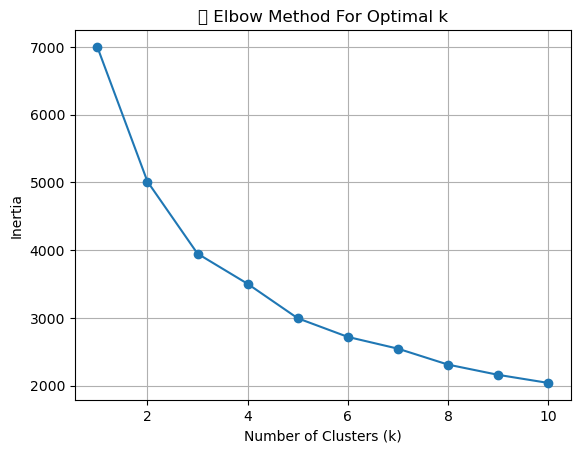

In [11]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('📐 Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Client_Segment'] = kmeans.fit_predict(X_scaled)

C:\Users\gates\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\gates\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


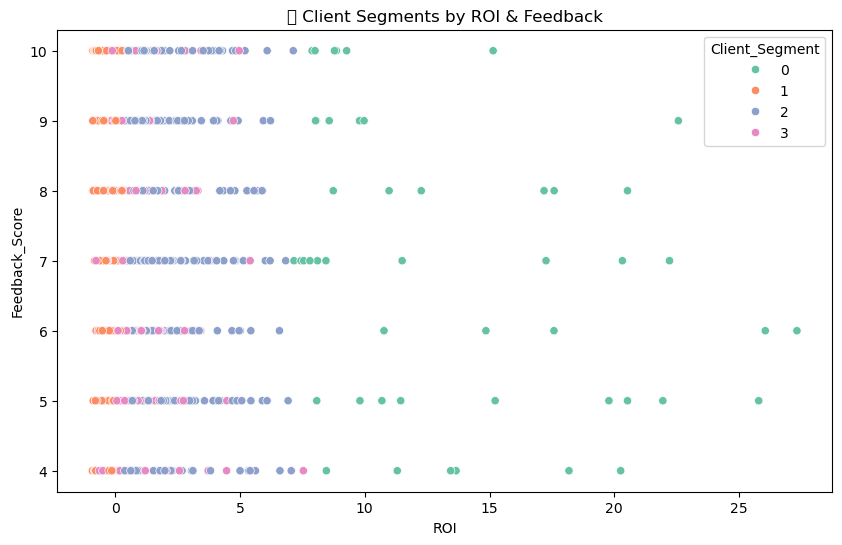

In [15]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='ROI',
    y='Feedback_Score',
    hue='Client_Segment',
    palette='Set2'
)
plt.title("🧠 Client Segments by ROI & Feedback")
plt.show()

In [17]:
segment_summary = df.groupby('Client_Segment')[features].mean().round(2)
segment_summary

,Project_Duration_Days,Project_Cost_INR,Revenue_Generated_INR,Profit_INR,ROI,Feedback_Score,Client_Success_Score
Client_Segment,,,,,,,
0,180.86,178860.73,2332389.53,2153528.80,13.57,6.94,5.85
1,194.64,1566433.28,1022622.78,-543810.50,-0.35,7.36,0.30
2,211.30,985778.91,2368190.66,1382411.75,2.04,7.15,1.25
3,200.00,692174.33,958242.54,266068.21,0.70,6.22,0.69


In [19]:
def save_all_charts():
    # Example: saving one seaborn chart
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Service_Used', order=df['Service_Used'].value_counts().index)
    plt.title("QA Services")
    plt.xticks(rotation=45)
    plt.savefig("../reports/service_usage.png", dpi=300, bbox_inches='tight')
    plt.close()